# PAP2 V256: Röntgenfluoreszenz

Aufgabe1: 

Erstellen Sie mit der Software Origin eine Arbeitsmappe die folgende Spalten besitzt:
- Kernladungszahl Z (x- Zuordnung).
- Energie der Kα- Strahlung Eα (y- Zuordnung).
- Peakbreite der Kα- Strahlung (y- Fehler Zuordnung). 
- Die Größe √Eα und dessen Fehler.

Tragen Sie √Eα mit Fehlern grafisch u ̈ber Z auf und passen Sie die Funktion √E =√E (Z−σ )  1 − 1  an.Fu ̈rn undn müsse nSi edie
α R 12 n2 n2 1 2 12
passenden Hauptquantenzahlen wa ̈hlen. ER und σ12 sind freie Fitparameter. Vergleichen Sie die bestimmten Fitparametern mit dem Literaturwert bzw. Ih- ren Erwartungen. Wiederholen Sie die Auswertung fu ̈r die Kβ- Strahlung.

- k alpha = 1
- k beta = 1.8

[ 2.1   2.53  2.73  2.83  2.9   3.98  4.18  4.69]
[ 22.  26.  28.  29.  30.  40.  42.  47.]
[ 1.  1.]
[ inf  inf]


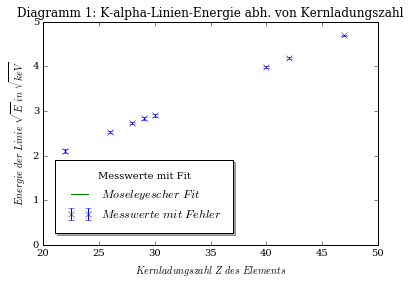

In [18]:
#Aufgabe 1: Auswertung k_alpha-Strahlung: 

#Import der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Einlesen der Daten in folgender Reihenfolge:
Z, Ea, sEa, sqEa, dsqEa = np.loadtxt('tab1_p.txt', skiprows=3, usecols=(1,2,3,4,5), unpack=True)
#Kernladungszahl Z
#Energie der K_alpha-Strahlung Ea
#Peakbreite der Ka Strahlung sEa
#Wurzel aus Ea: sqEa
#Fehler der Wurzel: dsqEa

print sqEa
print Z

#Fitfunktion: Moseleyesches Gesetz (wie in Einleitung vereinfacht)
def fit_func(x, sigma, E): 
    return np.sqrt(E)*(x - sigma)*np.sqrt(3/4)

popt, pcov = curve_fit(fit_func, Z, sqEa)

print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.errorbar(Z, sqEa, yerr=dsqEa, linestyle='None', marker='x', label='$Messwerte\ mit\ Fehler$')
plt.plot(Z, fit_func(Z, *popt), label='$Moseleyescher\ Fit$')
plt.xlabel('$Kernladungszahl\ Z\ des\ Elements$')
plt.ylabel('$Energie\ der\ Linie\ \sqrt{E} \ in\ \sqrt{keV}$')
plt.title('Diagramm 1: K-alpha-Linien-Energie abh. von Kernladungszahl')
plt.legend(loc='best')
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='best', shadow='true')
#plt.text(0.2, 9, u'$1\sigma-$ Untergrund', fontsize=10)
#plt.text(0.2, 3.5, u'$1\sigma-$Nulleffekt', fontsize=10)
#plt.savefig('v256_1.pdf',format='pdf')

In [9]:
print popt

[ 1.  1.]


In [15]:
curve_fit?